# Aprendizado de Máquina - Algoritmos de Regressão

A Regressão é um dos métodos de previsão mais utilizados no meio estatístico, usado para estimar o valor de algo baseado em uma série de outros dados históricos. Como exemplo podemos citar a regressão linear, a decision tree, e o SRV.

## Regressão Linear

Sua origem vem da correlação linear, que é a verificação da existência de um relacionamento entre duas variáveis. Ou seja, dado X e Y, quanto que X explica Y. Para isso, a regressão linear utiliza os pontos de dados para encontrar a melhor linha de ajuste para modelar essa relação.

<img src="exemplo.jpg" style=width:500px;height:400px/>

## Exercício

### Importando bibliotecas

In [1]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Criação do modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

### Avaliação de métricas
from sklearn.metrics import mean_squared_error

### Leitura dos dados

In [2]:
data = pd.read_csv("student_scores.csv")
data.head()
###importando no google collab

#import io

#from google.colab import files
#uploaded = files.upload()

#data = pd.read_csv(io.BytesIO(uploaded['student_scores.csv']))
#data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Análise exploratória

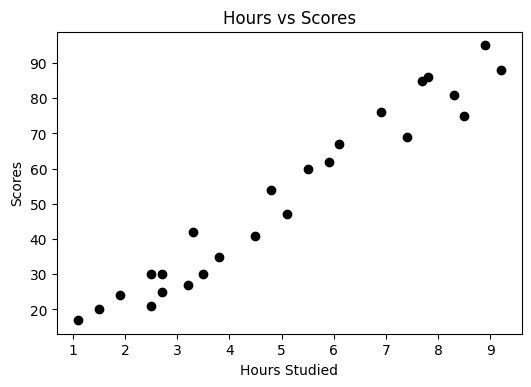

In [5]:
plt.rcParams["figure.dpi"] = 100
plt.scatter(data["Hours"], data["Scores"], color="black")
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

### Definição do modelo e treino

In [3]:
#instanciando modelo
linear = LinearRegression()

In [6]:
#Separando dados
## Variável preditora
x = data["Hours"]
x = np.array(x).reshape(-1,1)

## Variável alvo
y = data["Scores"]
y = np.array(y).reshape(-1,1)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (20, 1)
Tamanho X de teste: (5, 1)
Tamanho y de treino: (20, 1)
Tamanho y de teste: (5, 1)


In [7]:
#Treinando o sistema
linear.fit(X_train, y_train)

LinearRegression()

# Treinando modelos

### Predições

In [8]:
#Prevendo valores
y_predict = linear.predict(X_test)

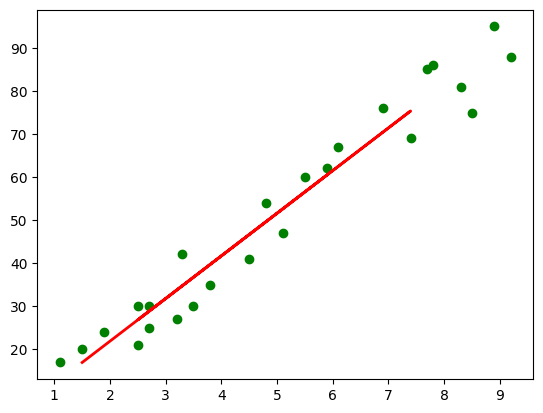

In [9]:
plt.scatter(data["Hours"], data["Scores"], color="green")
plt.plot(X_test, y_predict, color="red", linewidth=2)
plt.show()

## Métrica de avaliação

### RMSE (Erro quadrático médio)

É comumente usada para expressar a acurácia dos resultados numéricos do modelo. (Quanto maior seu valor, pior o desempenho do modelo).

<img src="eqm.jpg" style=width:500px;height:400px/>

Obs:

    Overfitting: Quando o RMSE é muito próximo de 0, o sistema se torna "viciado", e acaba por se perder e não saber qual caminho seguir.
    Underfitting: Quando o RMSE é muito alto, e os dados acabam por não serem suficientes e satisfatórios para predições futuras.

In [10]:
#Avaliando o modelo
mse = mean_squared_error(y_test, y_predict)
print("MSE: ", mse)

MSE:  21.598769307217406


### Predição do usuário

In [11]:
pergunta =np.array([1,4,800,15,5.5]).reshape(-1,1)
resposta = linear.predict(pergunta)
for i in range(5):
    print(f"Hoaras estudadas {pergunta[i][0]}, terá uma nota {resposta[i][0]}")

Hoaras estudadas 1.0, terá uma nota 11.92881652207693
Hoaras estudadas 4.0, terá uma nota 41.66078596400363
Hoaras estudadas 800.0, terá uma nota 7930.543344555221
Hoaras estudadas 15.0, terá uma nota 150.67800725106818
Hoaras estudadas 5.5, terá uma nota 56.526770684966976
